In [21]:
import pandas as pd 
import numpy as np

In [22]:
hr_df = pd.read_csv('hr_data.csv')

In [23]:
hr_df.head(5)

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [24]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [25]:
hr_df.Status.value_counts(normalize= True)

Joined        0.813007
Not Joined    0.186993
Name: Status, dtype: float64

In [26]:
hr_df['DOJ Extended'].value_counts()

No     4788
Yes    4207
Name: DOJ Extended, dtype: int64

In [27]:
hr_df['Candidate Source'].value_counts(normalize= True)

Direct               0.533741
Agency               0.287382
Employee Referral    0.178877
Name: Candidate Source, dtype: float64

In [28]:
pd.crosstab(hr_df['LOB'], hr_df['Age'])

Age,20,21,22,23,24,25,26,27,28,29,...,43,44,45,46,47,48,49,50,51,60
LOB,,,,,,,,,,,,,,,,,,,,,
AXON,0,0,0,1,3,11,35,45,50,38,...,1,0,1,1,1,0,1,1,0,0
BFSI,0,0,1,0,18,82,164,175,151,125,...,1,2,2,1,0,0,0,0,0,0
CSMP,0,0,0,2,15,47,58,86,53,48,...,0,0,0,0,0,1,1,0,0,0
EAS,0,0,0,0,0,13,17,24,23,20,...,1,0,1,0,0,0,1,2,0,0
ERS,0,0,3,44,139,249,303,241,218,162,...,2,1,1,0,0,0,0,0,1,1
ETS,0,0,0,2,7,32,55,77,70,56,...,3,0,0,1,0,0,0,0,0,0
Healthcare,0,0,0,3,3,9,12,17,15,14,...,0,0,0,0,0,0,0,0,0,0
INFRA,2,3,54,169,212,233,192,235,191,169,...,3,3,4,0,1,2,0,1,0,0
MMS,0,0,0,0,0,1,4,7,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

(array([3.090e+02, 6.063e+03, 2.135e+03, 3.440e+02, 7.700e+01, 4.400e+01,
        1.300e+01, 5.000e+00, 4.000e+00, 1.000e+00]),
 array([-60.53 ,  -7.334,  45.862,  99.058, 152.254, 205.45 , 258.646,
        311.842, 365.038, 418.234, 471.43 ]),
 <BarContainer object of 10 artists>)

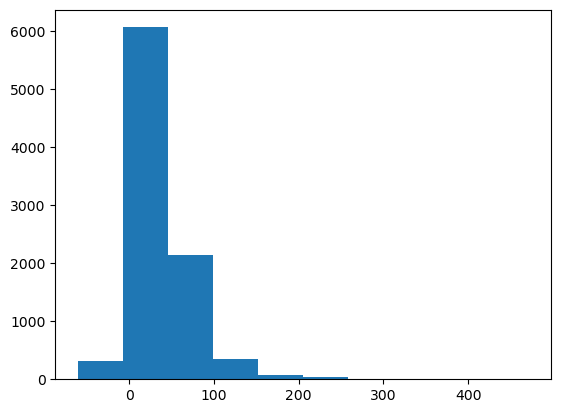

In [30]:
plt.hist(hr_df['Percent hike offered in CTC'])

In [31]:
hr_df['Status'] = hr_df['Status'].apply(lambda x: 0 if x == 'Joined' else 1)#converting Joined to 0 and notjoined 
#to 1 for ease

In [32]:
hr_df['Status'].value_counts()

0    7313
1    1682
Name: Status, dtype: int64

In [33]:
X_features = list(hr_df.columns)
X_features

['SLNO',
 'Candidate Ref',
 'DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Offered band',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Joining Bonus',
 'Candidate relocate actual',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'LOB',
 'Location',
 'Age',
 'Status']

In [35]:
X_features.remove('SLNO')
X_features.remove('Status')                  
X_features

['Candidate Ref',
 'DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Offered band',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Joining Bonus',
 'Candidate relocate actual',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'LOB',
 'Location',
 'Age']

<AxesSubplot:>

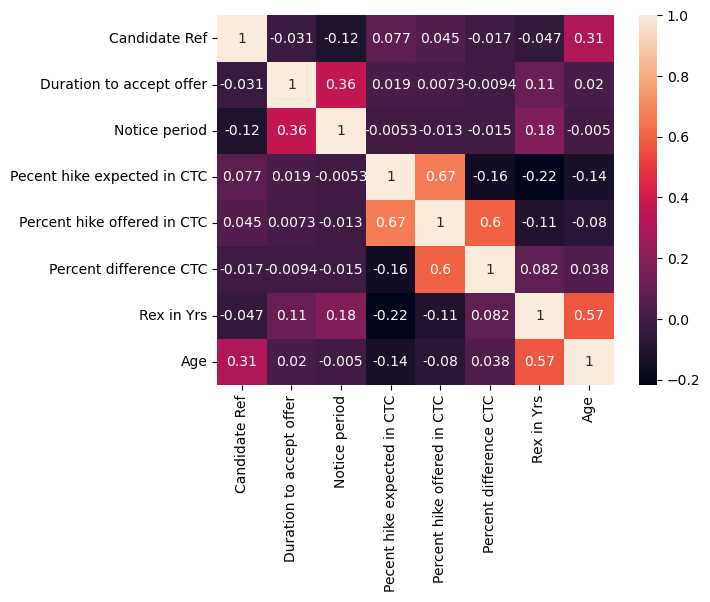

In [37]:
sn.heatmap(hr_df[X_features].corr(), annot= True)#shows percent hike in ctc and expected have a strong correlation
#Rex in years and age have a high correlation. We need to check multicollinearity later because of this

In [41]:
encoded_hr_df = pd.get_dummies(hr_df[X_features], drop_first= True)
list(encoded_hr_df)

['Candidate Ref',
 'Duration to accept offer',
 'Notice period',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Rex in Yrs',
 'Age',
 'DOJ Extended_Yes',
 'Offered band_E1',
 'Offered band_E2',
 'Offered band_E3',
 'Joining Bonus_Yes',
 'Candidate relocate actual_Yes',
 'Gender_Male',
 'Candidate Source_Direct',
 'Candidate Source_Employee Referral',
 'LOB_BFSI',
 'LOB_CSMP',
 'LOB_EAS',
 'LOB_ERS',
 'LOB_ETS',
 'LOB_Healthcare',
 'LOB_INFRA',
 'LOB_MMS',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Cochin',
 'Location_Gurgaon',
 'Location_Hyderabad',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Noida',
 'Location_Others',
 'Location_Pune']

In [42]:
X = encoded_hr_df
Y = hr_df.Status

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [49]:
import statsmodels.api as sm

In [52]:
Logit = sm.Logit(y_train, X_train)

In [53]:
logit_model = Logit.fit()

         Current function value: 0.414145
         Iterations: 35


/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                              Results: Logit
===========================================================================================================
Model:                             Logit                         Pseudo R-squared:              0.139      
Dependent Variable:                Status                        AIC:                           6030.3696  
Date:                              2023-10-05 14:27              BIC:                           6271.2145  
No. Observations:                  7196                          Log-Likelihood:                -2980.2    
Df Model:                          34                            LL-Null:                       -3462.0    
Df Residuals:                      7161                          LLR p-value:                   2.4081e-180
Converged:                         0.0000                        Scale:                         1.0000     
No. Iterations:                    35.0000                                                                 
-----------------------------------------------------------------------------------------------------------
                                    Coef.       Std.Err.       z    P>|z|       [0.025           0.975]    
-----------------------------------------------------------------------------------------------------------
Candidate Ref                        0.0000          0.0000  0.9160 0.3597          -0.0000          0.0000
Duration to accept offer             0.0002          0.0013  0.1230 0.9021          -0.0024          0.0027
Notice period                        0.0216          0.0016 13.8612 0.0000           0.0186          0.0247
Pecent hike expected in CTC          0.0015          0.0043  0.3588 0.7198          -0.0069          0.0100
Percent hike offered in CTC         -0.0029          0.0044 -0.6545 0.5128          -0.0115          0.0057
Percent difference CTC               0.0013          0.0059  0.2283 0.8194          -0.0102          0.0129
Rex in Yrs                           0.0321          0.0231  1.3933 0.1635          -0.0131          0.0773
Age                                 -0.0371          0.0110 -3.3572 0.0008          -0.0587         -0.0154
DOJ Extended_Yes                    -0.1283          0.0716 -1.7934 0.0729          -0.2686          0.0119
Offered band_E1                     -1.1400          0.2254 -5.0566 0.0000          -1.5818         -0.6981
Offered band_E2                     -0.9725          0.2463 -3.9475 0.0001          -1.4553         -0.4896
Offered band_E3                     -1.1809          0.3156 -3.7420 0.0002          -1.7994         -0.5624
Joining Bonus_Yes                    0.1547          0.1639  0.9439 0.3452          -0.1665          0.4759
Candidate relocate actual_Yes      -20.6194       1698.8917 -0.0121 0.9903       -3350.3859       3309.1472
Gender_Male                          0.1357          0.0885  1.5338 0.1251          -0.0377          0.3091
Candidate Source_Direct             -0.3053          0.0749 -4.0738 0.0000          -0.4521         -0.1584
Candidate Source_Employee Referral  -0.7015          0.1101 -6.3730 0.0000          -0.9173         -0.4858
LOB_BFSI                            -0.3945          0.1583 -2.4922 0.0127          -0.7048         -0.0843
LOB_CSMP                            -0.4255          0.1834 -2.3204 0.0203          -0.7849         -0.0661
LOB_EAS                              0.0670          0.2000  0.3351 0.7376          -0.3249          0.4589
LOB_ERS                             -0.2799          0.1502 -1.8637 0.0624          -0.5743          0.0145
LOB_ETS                             -0.6678          0.1779 -3.7536 0.0002          -1.0164         -0.3191
LOB_Healthcare                      -0.5414          0.2985 -1.8138 0.0697          -1.1264          0.0436
LOB_INFRA                           -0.8591          0.1626 -5.2825 0.0000          -1.1778         -0.5403
LO

In [60]:
def get_significant_vars(lm):
    var_pvalue_df = pd.DataFrame(lm.pvalues)
    var_pvalue_df['var'] = var_pvalue_df.index
    var_pvalue_df.columns = ['pvalue', 'var']
    return list(var_pvalue_df[var_pvalue_df.pvalue <= 0.05]['var'])

In [61]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['Notice period',
 'Age',
 'Offered band_E1',
 'Offered band_E2',
 'Offered band_E3',
 'Candidate Source_Direct',
 'Candidate Source_Employee Referral',
 'LOB_BFSI',
 'LOB_CSMP',
 'LOB_ETS',
 'LOB_INFRA']

In [64]:
y_pred = logit_model.predict(X_test[list(encoded_hr_df)])

In [65]:
y_pred_df = pd.DataFrame({'actual': y_test, 'predicted_prob': y_pred})

In [67]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state= 42)

,actual,predicted_prob,predicted
330,0,9.625791e-02,0
8702,0,3.154831e-10,0
7174,0,3.469119e-10,0
4391,0,2.190670e-01,0
1315,0,3.765540e-01,0
1323,0,1.492709e-01,0
17,0,5.618152e-02,0
379,0,2.101345e-01,0
1430,0,2.785401e-10,0
8911,0,5.098940e-02,0


In [68]:
from sklearn.metrics import confusion_matrix, classification_report
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sn.heatmap(cm, annot= True, fmt= '.2f', xticklabels= ['Not Joined', 'Joined'], 
              yticklabels= ['Not Joined', 'Joined'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

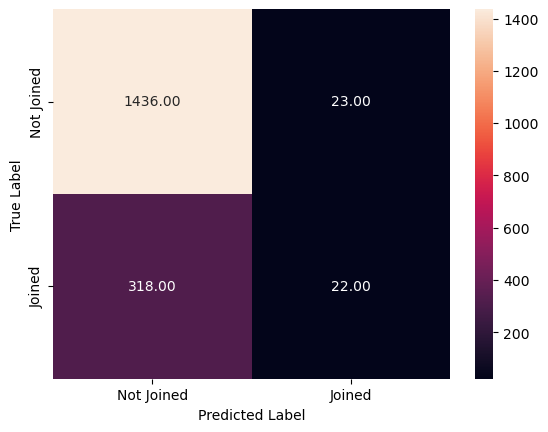

In [69]:
draw_cm(y_pred_df.actual, y_pred_df.predicted)

In [70]:
print(classification_report(y_pred_df.actual, y_pred_df.predicted))#this shows that with general model
#the recall for 1 is 0.06 and f1 score is 0.11 which is very less. 

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1459
           1       0.49      0.06      0.11       340

    accuracy                           0.81      1799
   macro avg       0.65      0.52      0.50      1799
weighted avg       0.76      0.81      0.75      1799



In [71]:
#now we need to make a model with significant variables and need to predict

In [72]:
X_train = X_train[significant_vars]

In [73]:
logit_sign = sm.Logit(y_train, X_train)
logit_model_sign = logit_sign.fit()

Optimization terminated successfully.
         Current function value: 0.448861
         Iterations 6


In [74]:
logit_model_sign.summary2()#the new model shows that BFSI and CSMP LOB are not significant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.067     
Dependent Variable:        Status                AIC:                   6482.0085 
Date:                      2023-10-05 15:49      BIC:                   6557.7025 
No. Observations:          7196                  Log-Likelihood:        -3230.0   
Df Model:                  10                    LL-Null:               -3462.0   
Df Residuals:              7185                  LLR p-value:           2.2191e-93
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            6.0000                                                 
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Notice period                       0.0206   0.0014 15.1004 0.0000  0.0179  0.0232
Age                                -0.0318   0.0064 -4.9938 0.0000 -0.0442 -0.0193
Offered band_E1                    -1.0631   0.1846 -5.7577 0.0000 -1.4250 -0.7012
Offered band_E2                    -0.7426   0.2063 -3.5988 0.0003 -1.1470 -0.3382
Offered band_E3                    -0.8716   0.2605 -3.3456 0.0008 -1.3823 -0.3610
Candidate Source_Direct            -0.2932   0.0691 -4.2438 0.0000 -0.4286 -0.1578
Candidate Source_Employee Referral -0.7222   0.1063 -6.7939 0.0000 -0.9305 -0.5138
LOB_BFSI                            0.1356   0.0856  1.5847 0.1130 -0.0321  0.3033
LOB_CSMP                           -0.2146   0.1352 -1.5881 0.1123 -0.4795  0.0503
LOB_ETS                            -0.3978   0.1287 -3.0912 0.0020 -0.6501 -0.1456
LOB_INFRA                          -0.7240   0.0851 -8.5099 0.0000 -0.8908 -0.5573
==================================================================================

"""

In [76]:
significant_vars_1 = get_significant_vars(logit_model_sign)
significant_vars_1

['Notice period',
 'Age',
 'Offered band_E1',
 'Offered band_E2',
 'Offered band_E3',
 'Candidate Source_Direct',
 'Candidate Source_Employee Referral',
 'LOB_ETS',
 'LOB_INFRA']

In [77]:
y_pred = logit_model_sign.predict(X_test[significant_vars])

In [78]:
y_pred_df['predicted_new'] = y_pred

In [79]:
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1799 entries, 4622 to 8436
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   actual          1799 non-null   int64  
 1   predicted_prob  1799 non-null   float64
 2   predicted       1799 non-null   int64  
 3   predicted_new   1799 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 70.3 KB


In [80]:
y_pred_df['new_predict'] = y_pred_df.predicted_new.map(lambda x: 1 if x > 0.5 else 0)

In [82]:
print(classification_report(y_pred_df.actual, y_pred_df.new_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1459
           1       0.40      0.01      0.02       340

    accuracy                           0.81      1799
   macro avg       0.61      0.50      0.46      1799
weighted avg       0.73      0.81      0.73      1799



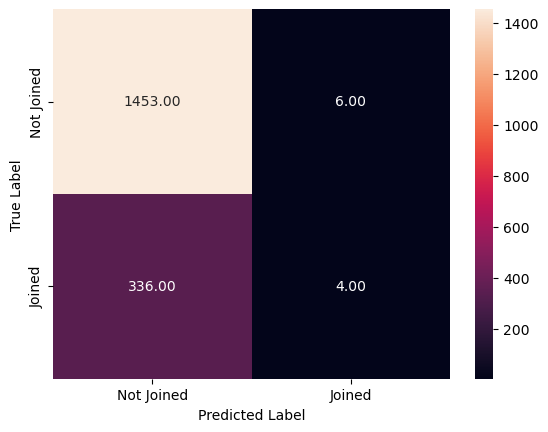

In [83]:
draw_cm(y_pred_df.actual, y_pred_df.new_predict)

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

In [85]:
roc_auc_score(y_pred_df.actual, y_pred_df.predicted_prob)

0.7264423658428416

In [86]:
roc_auc_score(y_pred_df.actual, y_pred_df.predicted_new)

0.6474831673587872

In [87]:
def draw_roc(actual, probability):
    fpr, tpr, thresholds = roc_curve(actual, probability, drop_intermediate= False)
    auc_score = roc_auc_score(actual, probability)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1- True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    return fpr, tpr, thresholds

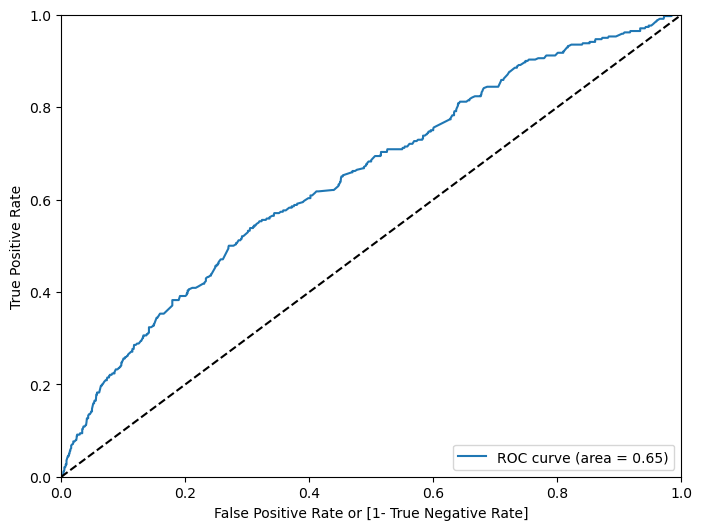

In [97]:
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_new)

In [98]:
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending= False)[0:5]#here it shows to take optimal cut off as 0.20. hence
#we need to make the changes and build a model again

,tpr,fpr,thresholds,diff
280,0.538235,0.304318,0.206535,0.233917
293,0.552941,0.319397,0.202286,0.233544
281,0.538235,0.305003,0.206435,0.233232
288,0.544118,0.311172,0.203668,0.232946
294,0.552941,0.320082,0.202091,0.232859


In [99]:
y_pred_df['new_predict'] = y_pred_df.predicted_new.map(lambda x: 1 if x > 0.2 else 0)

In [100]:
print(classification_report(y_pred_df.actual, y_pred_df.new_predict))#the recall and f1 score of not joined 
#that is 1 is improved now

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1459
           1       0.28      0.56      0.37       340

    accuracy                           0.65      1799
   macro avg       0.57      0.61      0.57      1799
weighted avg       0.76      0.65      0.68      1799



In [101]:
#we need to reperform the model by removing the next set of insiginificant variables

In [102]:
X_train = X_train[significant_vars_1]

In [103]:
logit_final = sm.Logit(y_train, X_train)
logit_final_model = logit_final.fit()

Optimization terminated successfully.
         Current function value: 0.449300
         Iterations 6


In [104]:
logit_final_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.066     
Dependent Variable:        Status                AIC:                   6484.3314 
Date:                      2023-10-05 18:59      BIC:                   6546.2630 
No. Observations:          7196                  Log-Likelihood:        -3233.2   
Df Model:                  8                     LL-Null:               -3462.0   
Df Residuals:              7187                  LLR p-value:           8.6324e-94
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            6.0000                                                 
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
Notice period                       0.0207   0.0014 15.2267 0.0000  0.0180  0.0234
Age                                -0.0312   0.0063 -4.9379 0.0000 -0.0436 -0.0188
Offered band_E1                    -1.0629   0.1844 -5.7641 0.0000 -1.4243 -0.7015
Offered band_E2                    -0.7412   0.2063 -3.5936 0.0003 -1.1455 -0.3369
Offered band_E3                    -0.8782   0.2604 -3.3721 0.0007 -1.3886 -0.3678
Candidate Source_Direct            -0.3067   0.0687 -4.4642 0.0000 -0.4414 -0.1721
Candidate Source_Employee Referral -0.7347   0.1060 -6.9285 0.0000 -0.9426 -0.5269
LOB_ETS                            -0.4116   0.1256 -3.2766 0.0011 -0.6578 -0.1654
LOB_INFRA                          -0.7361   0.0817 -9.0053 0.0000 -0.8963 -0.5759
==================================================================================

"""

In [106]:
y_pred = logit_final_model.predict(X_test[significant_vars_1])

In [107]:
y_pred_df['final_predicted_prob'] = y_pred

In [108]:
y_pred_df['final_predicted'] = y_pred_df.final_predicted_prob.map(lambda x: 1 if x > 0.20 else 0)

In [110]:
print(classification_report(y_pred_df.actual, y_pred_df.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1459
           1       0.28      0.56      0.38       340

    accuracy                           0.65      1799
   macro avg       0.58      0.62      0.57      1799
weighted avg       0.76      0.65      0.68      1799



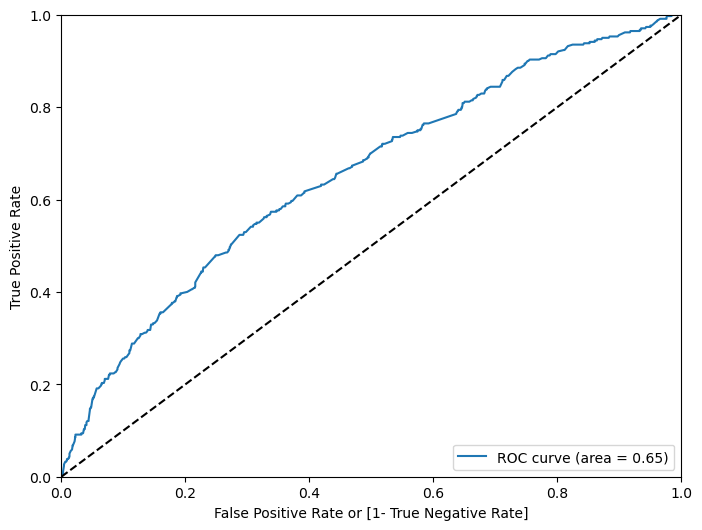

In [111]:
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.final_predicted_prob)

In [112]:
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending= False)[0:5]

,tpr,fpr,thresholds,diff
197,0.523529,0.287183,0.211546,0.236346
227,0.573529,0.337903,0.198126,0.235627
208,0.541176,0.305689,0.205975,0.235488
216,0.550000,0.314599,0.202875,0.235401
213,0.547059,0.311857,0.203742,0.235201
